In [1]:
import datetime
from pathlib import Path
from typing import Union

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pgf import FigureCanvasPgf

matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
sns.set_theme()
plt.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'pgf.preamble': '\\usepackage{lmodern}',
})

frames = [
    pd.read_csv(Path.cwd().joinpath('data/vienna_20100101_20131231.csv'), index_col='time', parse_dates=True),
    pd.read_csv(Path.cwd().joinpath('data/vienna_20140101_20171231.csv'), index_col='time', parse_dates=True),
    pd.read_csv(Path.cwd().joinpath('data/vienna_20180101_20211231.csv'), index_col='time', parse_dates=True)
]
df = pd.concat(frames)
df.index = df.index.tz_convert(None)
df

,station,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P0,P0_FLAG,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,5925,214.0,0.0,2.2,0.0,972.5,994.0,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:10:00,5925,231.0,0.0,2.0,0.0,972.3,993.8,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:20:00,5925,240.0,0.0,1.6,0.0,972.1,993.6,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:30:00,5925,229.0,0.0,1.2,0.0,972.0,993.4,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.3,100.0,NaN,0.0
2010-01-01 00:40:00,5925,269.0,0.0,0.4,0.0,971.9,993.3,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.4,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,5925,282.0,100.0,9.8,100.0,999.2,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.3,100.0,7.2,0.0
2021-12-31 23:20:00,5925,278.0,100.0,9.4,100.0,999.3,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.2,100.0,7.3,0.0
2021-12-31 23:30:00,5925,283.0,100.0,10.0,100.0,999.3,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.2,100.0,7.1,0.0


In [2]:
def get_unique_column_values(df: pd.DataFrame) -> [str]:
    # returns a list of all columns in the dataframe that contain only one unique value (i.e. all rows are equal)
    # cf. https://stackoverflow.com/a/54405767
    def is_unique(s: pd.Series):
        a = s.to_numpy()
        return (a[0] == a).all()

    result = []
    for col in df.columns:
        if is_unique(df[col]):
            print(f'Column {col} has only a single value: {df[col][0]}')
            result.append(col)

    return result


def remove_duplicate_indices(df: Union[pd.DataFrame, pd.Series]) -> Union[pd.DataFrame, pd.Series]:
    duplicates = df[df.index.duplicated(keep=False)]
    if duplicates.empty:
        print('There are no duplicate indices')
        return df
    print('Duplicated indices:')
    print(duplicates.index)

    remove = df.index.duplicated(keep='last')
    return df[~remove]


# Remove columns without any information and duplicate indices
df.drop(columns=get_unique_column_values(df), inplace=True)
df = remove_duplicate_indices(df)
df

Column station has only a single value: 5925
There are no duplicate indices


,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P0,P0_FLAG,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,214.0,0.0,2.2,0.0,972.5,994.0,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:10:00,231.0,0.0,2.0,0.0,972.3,993.8,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:20:00,240.0,0.0,1.6,0.0,972.1,993.6,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:30:00,229.0,0.0,1.2,0.0,972.0,993.4,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.3,100.0,NaN,0.0
2010-01-01 00:40:00,269.0,0.0,0.4,0.0,971.9,993.3,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.4,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,282.0,100.0,9.8,100.0,999.2,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.3,100.0,7.2,0.0
2021-12-31 23:20:00,278.0,100.0,9.4,100.0,999.3,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.2,100.0,7.3,0.0
2021-12-31 23:30:00,283.0,100.0,10.0,100.0,999.3,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.2,100.0,7.1,0.0


We will predict the air temperature measurements 2m above ground ("TL").
Possible input attributes are air temperature (TL), air pressure (P), reduced air pressure (P0), wind direction (DD), mean wind speed (FFAM), relative humidity (RF), precipitation (RR), sun shine duration (SO), and dew point (TP).

In [3]:
# first, we check whether the index is indeed complete (every 10 minutes)
print(f'Dataset ranging from {df.index.min()} to {df.index.max()} in 10-minute steps:')
(df.index == pd.date_range(df.index.min(), df.index.max(), freq='10min')).all(axis=0)

Dataset ranging from 2010-01-01 00:00:00 to 2021-12-31 23:50:00 in 10-minute steps:


True

In [4]:
# let's see how complete the data is
df[df.isna().any(axis=1)]

,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P0,P0_FLAG,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,214.0,0.0,2.2,0.0,972.5,994.0,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:10:00,231.0,0.0,2.0,0.0,972.3,993.8,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:20:00,240.0,0.0,1.6,0.0,972.1,993.6,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:30:00,229.0,0.0,1.2,0.0,972.0,993.4,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.3,100.0,NaN,0.0
2010-01-01 00:40:00,269.0,0.0,0.4,0.0,971.9,993.3,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.4,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,282.0,100.0,9.8,100.0,999.2,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.3,100.0,7.2,0.0
2021-12-31 23:20:00,278.0,100.0,9.4,100.0,999.3,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.2,100.0,7.3,0.0
2021-12-31 23:30:00,283.0,100.0,10.0,100.0,999.3,NaN,1.0,100.0,59.0,100.0,0.0,100.0,0.0,100.0,15.2,100.0,7.1,0.0


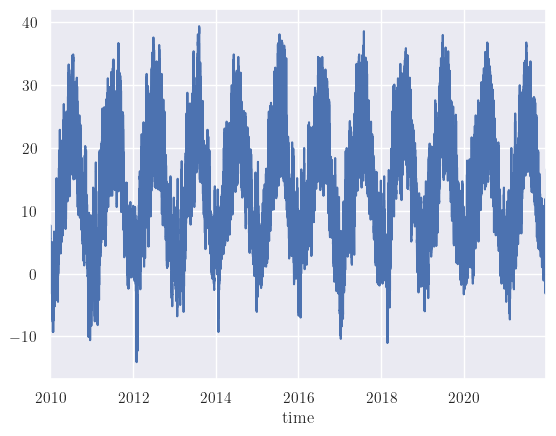

In [5]:
df['TL'].plot()
plt.show()

In [6]:
# we have many gaps due to incomplete reduced air pressure (P0)
# if we remove the column, we halve the number of measurements with missing values
without_p0 = df.drop(columns=['P0', 'P0_FLAG'])
df[without_p0.isna().any(axis=1)]

,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P0,P0_FLAG,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,214.0,0.0,2.2,0.0,972.5,994.0,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:10:00,231.0,0.0,2.0,0.0,972.3,993.8,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:20:00,240.0,0.0,1.6,0.0,972.1,993.6,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.1,100.0,NaN,0.0
2010-01-01 00:30:00,229.0,0.0,1.2,0.0,972.0,993.4,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.3,100.0,NaN,0.0
2010-01-01 00:40:00,269.0,0.0,0.4,0.0,971.9,993.3,0.0,100.0,94.0,100.0,0.0,100.0,0.0,100.0,4.4,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11 03:40:00,298.0,300.0,3.5,300.0,997.5,NaN,1.0,200.0,60.0,200.0,0.0,300.0,0.0,300.0,21.7,300.0,NaN,2.0
2021-09-14 15:50:00,126.0,300.0,2.0,300.0,995.2,NaN,1.0,200.0,46.0,300.0,0.0,300.0,600.0,300.0,26.5,300.0,NaN,2.0
2021-10-19 10:30:00,89.0,300.0,1.3,300.0,1005.9,NaN,1.0,200.0,67.0,300.0,0.0,300.0,600.0,300.0,11.0,300.0,NaN,2.0


In [7]:
# another suspect of many missing values is the dew point (TP)
# then we suddenly only remain with 0.3% missing values
df = without_p0
without_tp = df.drop(columns=['TP', 'TP_FLAG'])
df[without_tp.isna().any(axis=1)]

,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG,TP,TP_FLAG
time,,,,,,,,,,,,,,,,
2010-02-01 10:30:00,267.0,0.0,NaN,0.0,989.6,100.0,62.0,100.0,0.0,500.0,551.0,100.0,0.7,100.0,NaN,0.0
2010-02-02 14:30:00,NaN,0.0,NaN,NaN,994.9,500.0,57.0,500.0,0.0,500.0,600.0,300.0,2.6,500.0,NaN,0.0
2010-02-02 23:20:00,NaN,0.0,NaN,NaN,991.1,500.0,49.0,500.0,0.0,500.0,NaN,200.0,0.4,500.0,NaN,0.0
2010-02-17 12:20:00,NaN,0.0,NaN,2.0,978.7,500.0,80.0,500.0,0.0,500.0,600.0,300.0,3.6,500.0,NaN,0.0
2010-02-21 04:20:00,274.0,0.0,NaN,0.0,982.6,100.0,67.0,100.0,0.0,500.0,0.0,100.0,2.4,100.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-15 07:40:00,NaN,400.0,NaN,400.0,992.1,200.0,51.0,200.0,0.0,200.0,NaN,400.0,20.5,200.0,10.0,0.0
2020-07-15 07:50:00,NaN,400.0,NaN,400.0,992.1,200.0,51.0,200.0,0.0,200.0,NaN,400.0,20.6,200.0,10.1,0.0
2020-07-15 08:00:00,NaN,400.0,NaN,400.0,992.1,200.0,50.0,200.0,0.0,200.0,NaN,400.0,21.0,200.0,10.1,0.0


In [8]:
# for small gaps (up to 3 hours) we use simple linear interpolation
df = without_tp
df = df.interpolate(method='linear', limit=17, limit_area='inside')
gaps = df[df.isna().any(axis=1)]
gaps

,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG
time,,,,,,,,,,,,,,
2010-07-29 18:40:00,279.0,0.0,4.8,0.0,989.1,100.0,81.0,100.0,NaN,400.0,0.0,100.0,16.7,100.0
2010-07-29 18:50:00,269.0,0.0,4.4,0.0,989.3,100.0,81.0,100.0,NaN,400.0,0.0,100.0,16.6,100.0
2010-07-29 19:00:00,266.0,0.0,4.0,0.0,989.5,100.0,81.0,100.0,NaN,200.0,0.0,100.0,16.6,100.0
2010-07-29 19:10:00,248.0,0.0,3.4,0.0,989.8,100.0,82.0,100.0,NaN,400.0,0.0,100.0,16.6,100.0
2010-07-29 19:20:00,234.0,0.0,3.3,0.0,990.1,100.0,83.0,100.0,NaN,400.0,0.0,100.0,16.5,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15 12:00:00,NaN,2.0,NaN,2.0,NaN,400.0,NaN,400.0,0.0,300.0,NaN,400.0,NaN,400.0
2020-03-15 12:10:00,NaN,2.0,NaN,2.0,NaN,400.0,NaN,400.0,0.0,300.0,NaN,400.0,NaN,400.0
2020-03-15 12:20:00,NaN,2.0,NaN,2.0,NaN,400.0,NaN,400.0,0.0,300.0,NaN,400.0,NaN,400.0


In [9]:
# we still have some bigger gaps in the data concentrated on a few days
# interpolation is not sufficient, as we cannot interpolate over a gap of multiple days.
gap_days = gaps.index.map(pd.Timestamp.date).unique()
print('Missing values on :')
for day in gap_days:
    daily = df.loc[str(day)]
    missing = daily[daily.isna().any(axis=1)]
    print(f'{day}: {len(missing)}\t(={len(missing) / (60 / 10 * 24) * 100:.2f}%)')

Missing values on :
2010-07-29: 32	(=22.22%)
2010-07-30: 60	(=41.67%)
2011-10-07: 45	(=31.25%)
2011-10-08: 1	(=0.69%)
2011-10-09: 18	(=12.50%)
2014-11-29: 59	(=40.97%)
2014-11-30: 144	(=100.00%)
2014-12-01: 65	(=45.14%)
2017-04-02: 1	(=0.69%)
2017-04-04: 22	(=15.28%)
2018-04-01: 107	(=74.31%)
2018-04-02: 144	(=100.00%)
2018-04-03: 35	(=24.31%)
2020-03-13: 5	(=3.47%)
2020-03-14: 144	(=100.00%)
2020-03-15: 77	(=53.47%)


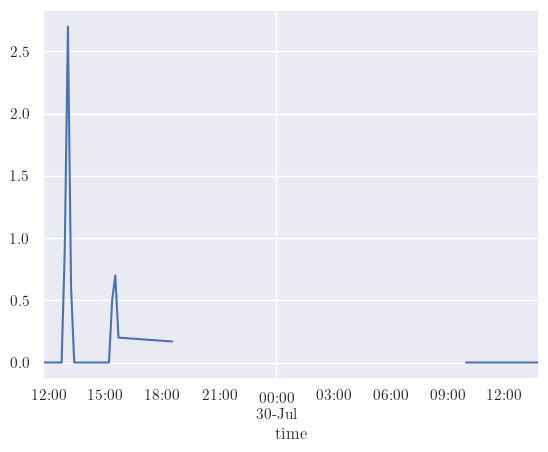

In [10]:
# let's look at the gaps one after another
from datetime import datetime, timedelta


def extend_gap(gap: slice, delta: timedelta):
    return slice(datetime.fromisoformat(gap.start) - delta, datetime.fromisoformat(gap.stop) + delta)


# the first one has only missing precipitation
gap = slice('2010-07-29 15:40:00', '2010-07-30 09:50:00')
df.loc[extend_gap(gap, timedelta(hours=4)), 'RR'].plot()
plt.show()
# it is reasonable to let it stop raining
df.loc[gap, 'RR'] = 0

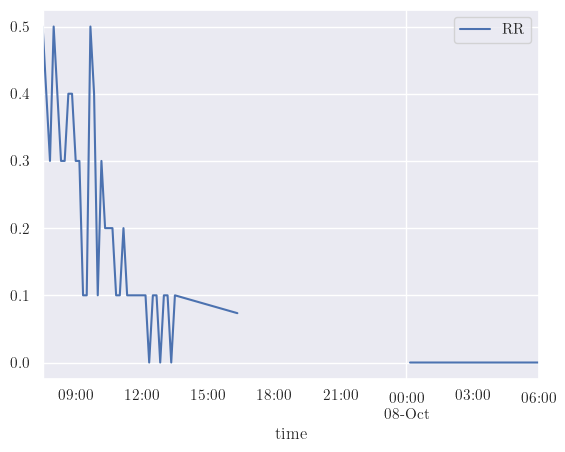

In [11]:
# next is again a precipitation gap
gap = slice('2011-10-07 13:30:00', '2011-10-08 00:00:00')
df.loc[extend_gap(gap, timedelta(hours=6)), ['RR']].plot()
plt.show()
# again, we can safely assume it stopped raining
df.loc[gap, ['RR']] = 0

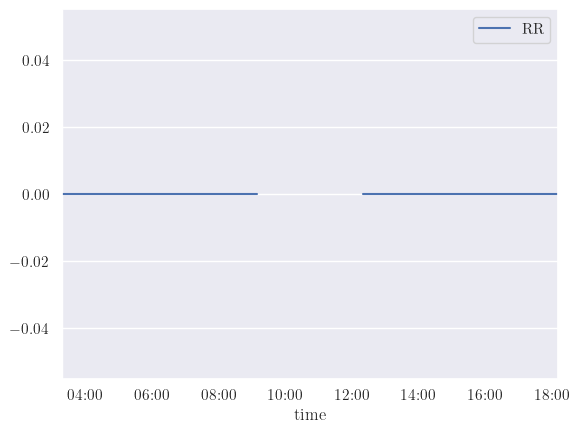

In [12]:
# another precipitation gap
gap = slice('2011-10-09 09:20:00', '2011-10-09 12:10:00')
df.loc[extend_gap(gap, timedelta(hours=6)), ['RR']].plot()
plt.show()
# probably hasn't rained
df.loc[gap, ['RR']] = 0

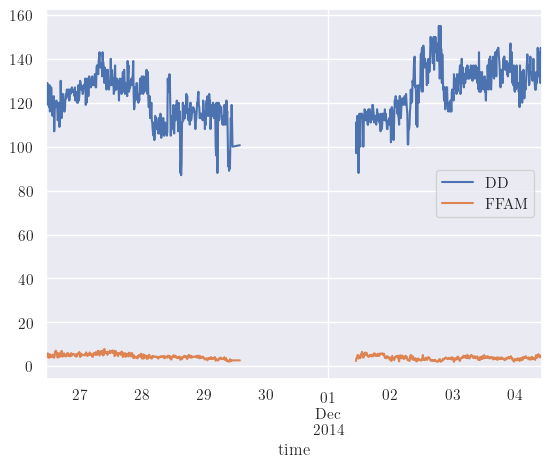

In [13]:
# the next one is a bigger wind direction + speed gap
gap = slice('2014-11-29 11:10:00', '2014-12-01 10:40:00')
df.loc[extend_gap(gap, timedelta(hours=72)), ['DD', 'FFAM']].plot()
plt.show()
# let's just re-use the last 24 hours over the period
for dt in pd.date_range(gap.start, gap.stop, freq='10min'):
    df.loc[dt, ['DD', 'FFAM']] = df.loc[dt - timedelta(hours=24), ['DD', 'FFAM']]

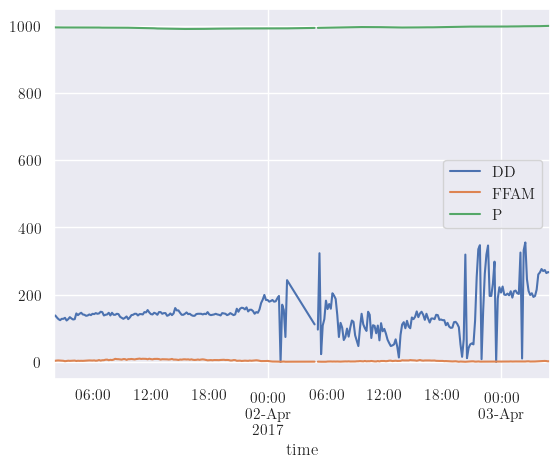

In [14]:
gap = slice('2017-04-02 02:00:00', '2017-04-02 05:00:00')
df.loc[extend_gap(gap, timedelta(hours=24)), ['DD', 'FFAM', 'P']].plot()
plt.show()
# linear interpolation should be fine also here
df.loc[extend_gap(gap, timedelta(hours=1))] = df.loc[extend_gap(gap, timedelta(hours=1))].interpolate(method='linear',
                                                                                                      limit=10,
                                                                                                      limit_area='inside')

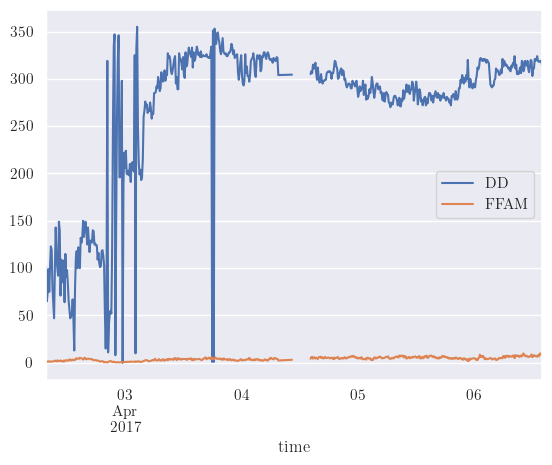

In [15]:
gap = slice('2017-04-04 07:40:00', '2017-04-04 14:10:00')
df.loc[extend_gap(gap, timedelta(hours=48)), ['DD', 'FFAM']].plot()
plt.show()
# wind has not changed significantly, let's repeat the past 4 hours
for dt in pd.date_range(gap.start, gap.stop, freq='10min'):
    df.loc[dt, ['DD', 'FFAM']] = df.loc[dt - timedelta(hours=4), ['DD', 'FFAM']]

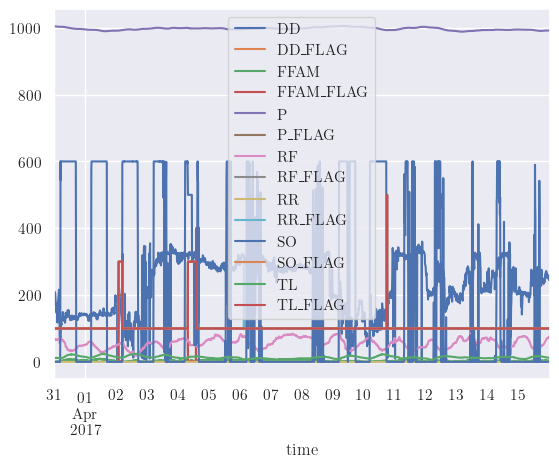

In [16]:
# now we have the biggest gap in the data
# %matplotlib qt
gap = slice('2017-04-05 23:50:00', '2017-04-09 23:50:00')
df.loc[extend_gap(gap, timedelta(hours=144))].plot()
plt.show()
# we cannot identify a significant weather change in these 4 days, hence we repeat the last 4 days
# only the wind direction has shifted a bit, but we would not know how to represent this in the data
for dt in pd.date_range(gap.start, gap.stop, freq='10min'):
    past_hours = [24, 48, 72]
    df.loc[dt] = 0
    for h in past_hours:
        df.loc[dt] += df.loc[dt - timedelta(h)]
    df.loc[dt] /= len(past_hours)
# %matplotlib inline

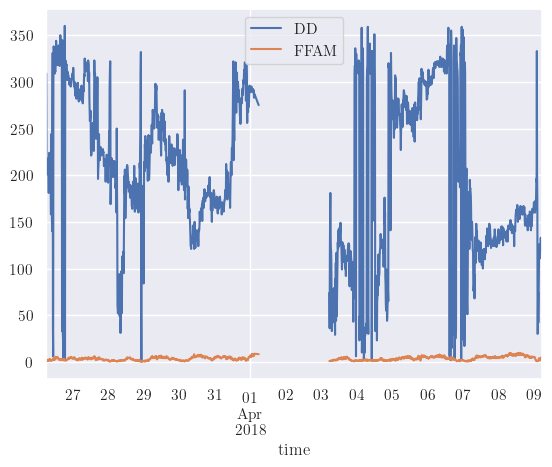

In [17]:
gap = slice('2018-04-01 06:10:00', '2018-04-03 05:40:00')
df.loc[extend_gap(gap, timedelta(hours=144)), ['DD', 'FFAM']].plot()
plt.show()
# three days ago a similar pattern occurred, we fill it up
for dt in pd.date_range(gap.start, gap.stop, freq='10min'):
    past_hours = [24, 48, 72]
    df.loc[dt] = 0
    for h in past_hours:
        df.loc[dt] += df.loc[dt - timedelta(h)]
    df.loc[dt] /= len(past_hours)

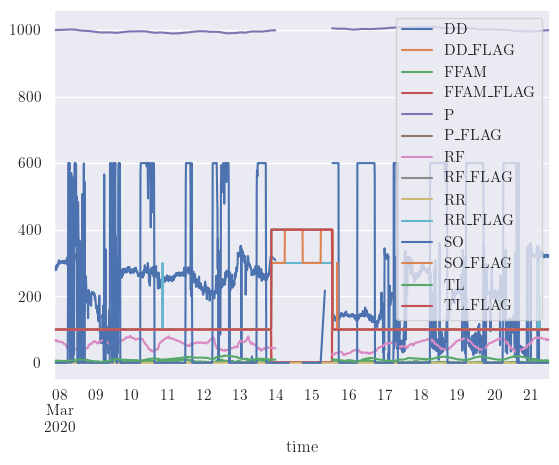

In [18]:
# and finally the COVID gap
gap = slice('2020-03-13 20:10:00', '2020-03-15 12:40:00')
df.loc[extend_gap(gap, timedelta(hours=144))].plot()
plt.show()
# we take the averages of the past three days
for dt in pd.date_range(gap.start, gap.stop, freq='10min'):
    past_hours = [24, 48, 72]
    df.loc[dt] = 0
    for h in past_hours:
        df.loc[dt] += df.loc[dt - timedelta(h)]
    df.loc[dt] /= len(past_hours)

In [19]:
# do a simple plausibility check of the final data (flag values above 300 indicate a potential faulty measurement)
df[(df['TL'] < -15) | (df['TL'] > 40) | (df['TL_FLAG'] > 300) | (df['RF_FLAG'] > 300) | (df['P_FLAG'] > 300)]

,DD,DD_FLAG,FFAM,FFAM_FLAG,P,P_FLAG,RF,RF_FLAG,RR,RR_FLAG,SO,SO_FLAG,TL,TL_FLAG
time,,,,,,,,,,,,,,
2010-02-02 14:30:00,283.00,0.0,5.70,0.0,994.9,500.0,57.0,500.0,0.0,500.0,600.0,300.0,2.6,500.0
2010-02-02 23:20:00,175.00,0.0,4.65,0.0,991.1,500.0,49.0,500.0,0.0,500.0,0.0,200.0,0.4,500.0
2010-02-17 12:20:00,129.50,0.0,5.60,2.0,978.7,500.0,80.0,500.0,0.0,500.0,600.0,300.0,3.6,500.0
2010-03-06 14:10:00,50.25,0.0,3.85,2.0,994.1,500.0,66.0,500.0,0.0,300.0,0.0,300.0,0.1,500.0
2010-03-06 14:20:00,51.50,0.0,3.60,2.0,994.2,500.0,67.0,500.0,0.0,300.0,0.0,300.0,0.2,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-11 11:50:00,245.00,100.0,4.00,100.0,1002.2,500.0,35.0,500.0,0.0,100.0,600.0,100.0,27.3,500.0
2018-12-07 08:50:00,175.00,100.0,2.20,100.0,997.0,500.0,81.0,500.0,0.0,100.0,0.0,100.0,4.7,500.0
2019-04-25 01:40:00,147.00,2.0,1.30,2.0,990.3,500.0,61.0,500.0,0.0,300.0,0.0,300.0,16.0,500.0


In [20]:
# remove the remaining flag attributes and arrive at a dataset without null values
df.drop(columns=['DD_FLAG', 'FFAM_FLAG', 'P_FLAG', 'RF_FLAG', 'RR_FLAG', 'SO_FLAG', 'TL_FLAG'], inplace=True)
print(f'Remaining NaN values: {df[df.isna().any(axis=1)]}')
df.describe()

Remaining NaN values: Empty DataFrame
Columns: [DD, FFAM, P, RF, RR, SO, TL]
Index: []


,DD,FFAM,P,RF,RR,SO,TL
count,631152.000000,631152.000000,631152.000000,631152.000000,631152.000000,631152.000000,631152.000000
mean,217.393233,3.405315,995.606364,66.889258,0.012495,143.023422,12.650091
std,90.437151,1.881471,7.792235,16.521493,0.131818,244.927312,8.689571
min,0.000000,0.200000,955.700000,8.000000,0.000000,0.000000,-14.100000
25%,140.000000,1.900000,991.000000,55.000000,0.000000,0.000000,5.800000
50%,244.000000,3.100000,995.600000,68.000000,0.000000,0.000000,12.500000
75%,295.000000,4.600000,1000.400000,80.000000,0.000000,219.250000,19.300000
max,360.000000,15.900000,1025.300000,100.000000,19.400000,600.000000,39.400000


In [21]:
# we need to encode the degrees of the wind direction: 360° should be close to 0°
df.loc[:, 'DD_sin'] = np.sin(df.loc[:, 'DD'] * np.pi / 180)
df.loc[:, 'DD_cos'] = np.cos(df.loc[:, 'DD'] * np.pi / 180)

In [22]:
# in the correlation matrix we see that all attributes are quite unique
df.corr()

,DD,FFAM,P,RF,RR,SO,TL,DD_sin,DD_cos
DD,1.000000,0.321145,0.058166,-0.073460,0.034886,-0.099929,-0.036378,-0.857735,0.409865
FFAM,0.321145,1.000000,-0.128558,-0.176372,0.053292,0.053890,-0.011509,-0.323131,0.124039
P,0.058166,-0.128558,1.000000,-0.065558,-0.054859,0.064962,-0.145130,-0.013931,0.128350
RF,-0.073460,-0.176372,-0.065558,1.000000,0.111205,-0.482928,-0.516196,0.043980,-0.094010
RR,0.034886,0.053292,-0.054859,0.111205,1.000000,-0.054285,-0.000036,-0.043873,0.025413
SO,-0.099929,0.053890,0.064962,-0.482928,-0.054285,1.000000,0.377692,0.139928,0.024741
TL,-0.036378,-0.011509,-0.145130,-0.516196,-0.000036,0.377692,1.000000,0.010188,-0.034787
DD_sin,-0.857735,-0.323131,-0.013931,0.043980,-0.043873,0.139928,0.010188,1.000000,-0.324162
DD_cos,0.409865,0.124039,0.128350,-0.094010,0.025413,0.024741,-0.034787,-0.324162,1.000000


In [23]:
df.to_pickle(Path.cwd().joinpath('zamg_vienna.pickle'))
df

,DD,FFAM,P,RF,RR,SO,TL,DD_sin,DD_cos
time,,,,,,,,,
2010-01-01 00:00:00,214.0,2.2,972.5,94.0,0.0,0.0,4.1,-0.559193,-0.829038
2010-01-01 00:10:00,231.0,2.0,972.3,94.0,0.0,0.0,4.1,-0.777146,-0.629320
2010-01-01 00:20:00,240.0,1.6,972.1,94.0,0.0,0.0,4.1,-0.866025,-0.500000
2010-01-01 00:30:00,229.0,1.2,972.0,94.0,0.0,0.0,4.3,-0.754710,-0.656059
2010-01-01 00:40:00,269.0,0.4,971.9,94.0,0.0,0.0,4.4,-0.999848,-0.017452
...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,282.0,9.8,999.2,59.0,0.0,0.0,15.3,-0.978148,0.207912
2021-12-31 23:20:00,278.0,9.4,999.3,59.0,0.0,0.0,15.2,-0.990268,0.139173
2021-12-31 23:30:00,283.0,10.0,999.3,59.0,0.0,0.0,15.2,-0.974370,0.224951


In [24]:
# when we sample hourly data we need to sum up the sunshine duration and precipitation for 1 hour
df['SO'] = df['SO'].rolling(6).sum()
df['RR'] = df['RR'].rolling(6).sum()
df = df.iloc[6:, :]  # remove created NaN entries (start with next full hour)
df

,DD,FFAM,P,RF,RR,SO,TL,DD_sin,DD_cos
time,,,,,,,,,
2010-01-01 01:00:00,335.0,0.5,971.5,93.0,0.0,0.0,4.7,-0.422618,0.906308
2010-01-01 01:10:00,342.0,0.6,971.6,92.0,0.0,0.0,4.8,-0.309017,0.951057
2010-01-01 01:20:00,92.0,1.4,971.5,92.0,0.0,0.0,4.7,0.999391,-0.034899
2010-01-01 01:30:00,82.0,1.1,971.4,93.0,0.0,0.0,4.7,0.990268,0.139173
2010-01-01 01:40:00,36.0,1.0,971.3,93.0,0.0,0.0,4.7,0.587785,0.809017
...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,282.0,9.8,999.2,59.0,0.0,0.0,15.3,-0.978148,0.207912
2021-12-31 23:20:00,278.0,9.4,999.3,59.0,0.0,0.0,15.2,-0.990268,0.139173
2021-12-31 23:30:00,283.0,10.0,999.3,59.0,0.0,0.0,15.2,-0.974370,0.224951


count    631146.000000
mean          0.074971
std           0.566874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          47.000000
Name: RR, dtype: float64


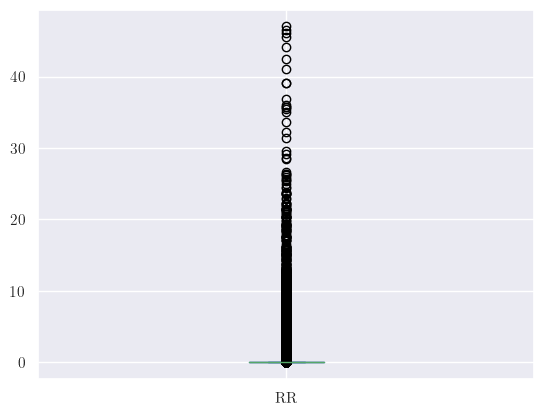

In [25]:
# be aware that precipitation is a very skewed distribution
# most of the time it is not raining, but sometimes it rains a lot
print(df['RR'].describe())
df['RR'].plot.box()
plt.show()

In [26]:
# we create an additional variant where 'RR' is min-max normalized
# equals a MaxAbsScaler, since the minimum value is 0
df['RR_norm'] = (df.loc[:, 'RR'] - df['RR'].min()) / (df['RR'].max() - df['RR'].min())
print(df['RR_norm'].describe())
df.to_pickle(Path.cwd().joinpath('zamg_vienna_hourly.pickle'))
df

count    631146.000000
mean          0.001595
std           0.012061
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RR_norm, dtype: float64


C:\Users\gabri\AppData\Local\Temp\ipykernel_81036\2495021891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RR_norm'] = (df.loc[:, 'RR'] - df['RR'].min()) / (df['RR'].max() - df['RR'].min())


,DD,FFAM,P,RF,RR,SO,TL,DD_sin,DD_cos,RR_norm
time,,,,,,,,,,
2010-01-01 01:00:00,335.0,0.5,971.5,93.0,0.0,0.0,4.7,-0.422618,0.906308,0.0
2010-01-01 01:10:00,342.0,0.6,971.6,92.0,0.0,0.0,4.8,-0.309017,0.951057,0.0
2010-01-01 01:20:00,92.0,1.4,971.5,92.0,0.0,0.0,4.7,0.999391,-0.034899,0.0
2010-01-01 01:30:00,82.0,1.1,971.4,93.0,0.0,0.0,4.7,0.990268,0.139173,0.0
2010-01-01 01:40:00,36.0,1.0,971.3,93.0,0.0,0.0,4.7,0.587785,0.809017,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,282.0,9.8,999.2,59.0,0.0,0.0,15.3,-0.978148,0.207912,0.0
2021-12-31 23:20:00,278.0,9.4,999.3,59.0,0.0,0.0,15.2,-0.990268,0.139173,0.0
2021-12-31 23:30:00,283.0,10.0,999.3,59.0,0.0,0.0,15.2,-0.974370,0.224951,0.0
